In [40]:
import numpy as np
import scipy as sp
from numpy import load 
from numpy import genfromtxt # Henter data fx:f = genfromtxt('DataHandIn1.csv', delimiter=',')[1:,0] *10**3 #i Hz
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow #kan også skrives som plt.imshow istedet for at hente den.
from pylab import ginput
from skimage.io import imread, imsave
from matplotlib.pyplot import axis, imshow, show
from matplotlib.pyplot import imshow, show, subplot, title

In [20]:
from glob import glob
#glob('*')             #viser hvilke filer der i mappen, som denne notebook ligger i. 

In [21]:
A = imread('cameraman.tif')     # Read in an image
print(type(A))                  # The type of an image is a numpy.ndarray
print(A.shape)                  # Print the dimensions (in pixels) of the image
print(A.dtype)                  # The data type of each pixel (element in the numpy.ndarray)
imsave('cameraman.jpg', A)      # Write an image

<class 'numpy.ndarray'>
(256, 256)
uint8


**Where is the JPEG file saved?**

In the same folder as the notebook

**What coding method was used to save the JPEG file?**

Imsave?

**Why is the file size different for the PNG and JPEG files?**

Compression 

**JPEG**: Provides lossy compression and can store pixel data in 
quantization of 8 bit unsigned integer per color channel (RGB). 
Compression level is controlled by a quality parameter.

**PNG**: Provides lossless compression. Can store pixel data in 
quantization of 1, 2, 4, 8, or 16 bit unsigned integer per channel 
and supports pixel formats grayscale, RGB, indexed, grayscale
and alpha, and RGBA (A=alpha channel).  

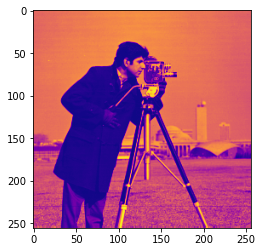

In [22]:
plt.imshow(A,cmap='plasma')

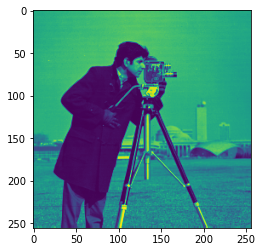

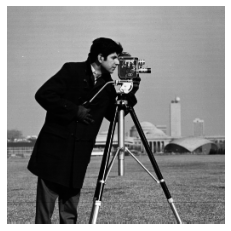

In [30]:

# Read in intensity image
A = imread('cameraman.tif');
                           # Display image using imshow - but the colors are wrong!
imshow(A)                  # Prepare to show the image in A
show()                     # This opens a window for each imshow call and displays the content
# Remove axes including tick marks and labels
axis('off')
# Display intensity image in gray-scale
imshow(A, cmap='gray') # Tell matplotlib to interpret A as a gray scale image
show()

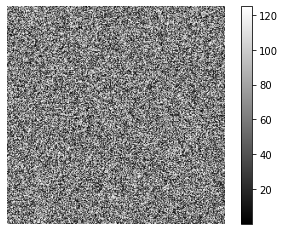

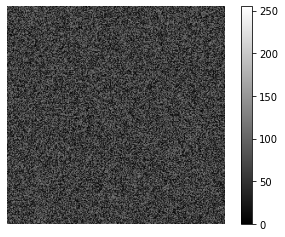

In [31]:
from matplotlib.pyplot import axis, colorbar, imshow, show, figure
from numpy.random import rand
from skimage.io import imread
# Generate random image array in range 0-125
B = rand(256, 256)*125;
figure(1) # Open a new figure window
axis('off')
imshow(B, cmap='gray');
colorbar()
show()
# We might expect that we should not have seen intensities above 125 (an average gray color),
# but we do because imshow automatically rescales the image.
# The colorbar shows the mapping between intensities being show and the values in B.
figure(2) # Open a new figure window
axis('off')
imshow(B, vmin=0, vmax=255, cmap='gray');
colorbar()
show()
# if we specify range of data explicitly by vmin and vmax, then imshow
# displays the correct image contrast

(159, 191) uint8
(367, 490) uint8
(135, 198, 3) uint8


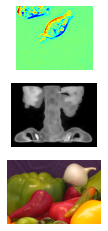

In [52]:
from matplotlib.pyplot import axis, imshow, show, subplot
from skimage.io import imread
# Read in 8-bit unsigned integer gray intensity image of cell
B = imread('cell.tif');
print(B.shape, B.dtype)

# Read in 16-bit unsigned integer gray intensity image of spine
C = imread('spine.tif');
print(C.shape, C.dtype)

# Read in 8-bit unsigned integer (per channel) colour image.
D = imread('onion.png');
print(D.shape, D.dtype)

# Creates a 3 by 1 mosaic of plots (first 2 parameters)
subplot(3,1,1)
# and display 1st image at sub-plot 1 (3rd parameter)
# Set colourmap to jet (false colours)
imshow(B, cmap='jet')
axis('off')

subplot(3,1,2)
# Display 2nd image at sub-plot 2
imshow(C, cmap='gray')
axis('off') # Which of the subplots does this method affect?
subplot(3,1,3)
# Display 3rd (colour) image at sub-plot 3
imshow(D)
axis('off')
show()
# Image of C looks wrong and we get a warning in the python interpreter.
# We will see what to do about this later
# Display 3rd (colour) image at sub-plot 3
#imshow(D)
#show()
# Image of C looks wrong and we get a warning in the python interpreter.
# We will see what to do about this later

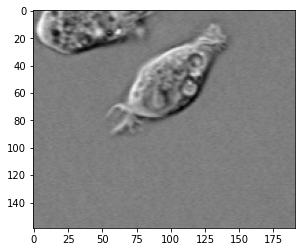

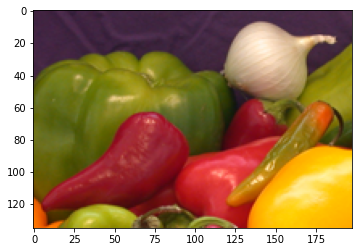

Click on 3 points in the image


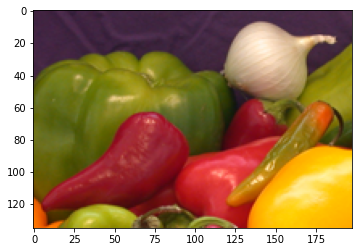

In [1]:
from matplotlib.pyplot import imshow, show
from skimage.io import imread
from pylab import ginput
# Read in 8-bit intensity image of cell
B = imread('cell.tif');
# Use the mouse cursor to examine the grayscale image in the interactive viewer
imshow(B, cmap='gray');
show()
# Read in 8-bit colour image.
D = imread('onion.png');
# Use the mouse cursor to examine the RGB image in the interactive viewer
imshow(D);
show()
# Use the mouse to get coordinate input to your program
imshow(D)
print('Click on 3 points in the image')
coord = ginput(3)
print('You clicked: ' + str(coord))
show()
# print pixel value at location (25,50)
print(B[25,50])
# set pixel value at (25,50) to white
B[25,50] = 255;
# view resulting changes in image
imshow(B, cmap='gray')
show()
# print RGB pixel value at location (25,50)
print(D[25,50,:])
# print only the red value at (25,50)
print(D[25,50,0])
D[25,50,:] = [255, 255, 255]; # set pixel value to RGB white
imshow(D)
# view resulting changes in image
show()

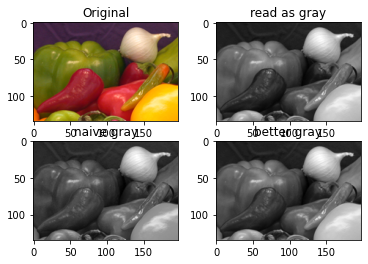

In [36]:
from matplotlib.pyplot import imshow, show, subplot, title
from skimage.io import imread
# Read in 8-bit RGB colour image.
D = imread('onion.png');
# convert it to a grayscale image
D_read_as_gray = imread('onion.png', as_gray=True)
D_naive_gray = 1/3 * D[:,:,0] + 1/3 * D[:,:,1] + 1/3 * D[:,:,2]
D_better_gray = 0.2989 * D[:,:,0] + 0.5870 * D[:,:,1] + 0.1140 * D[:,:,2]
# Display all images in a 2x2 figure
subplot(2,2,1)
title('Original')
imshow(D)
subplot(2,2,2)
title('read as gray')
imshow(D_read_as_gray, cmap='gray')
subplot(2,2,3)
title('naive gray')
imshow(D_naive_gray, cmap='gray')
subplot(2,2,4)
title('better gray')
imshow(D_better_gray, cmap='gray')
show()

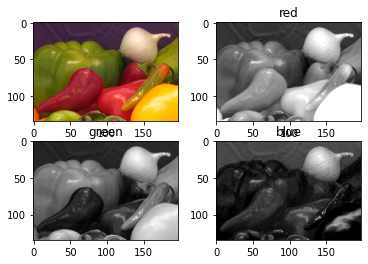

In [38]:
from matplotlib.pyplot import imshow, show, subplot, title
from skimage.io import imread
# Read in 8-bit RGB colour image.
D = imread('onion.png');
# extract red channel (1st channel)
Dred = D[:,:,0]
# extract green channel (2nd channel)
Dgreen = D[:,:,1]
# extract blue channel (3rd channel)
Dblue = D[:,:,2]
# Display all images in a 2x2 figure
subplot(2,2,1)
imshow(D)
subplot(2,2,2)
imshow(Dred, cmap='gray')
title('red');
subplot(2,2,3)
imshow(Dgreen, cmap='gray')
title('green');
subplot(2,2,4)
imshow(Dblue, cmap='gray')
title('blue');
show()

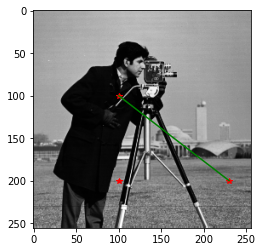

In [39]:
from matplotlib.pyplot import imshow, show, subplot, title, plot
from skimage.io import imread
I = imread('cameraman.tif') # Read in an image
imshow(I, cmap='gray') # Plot the image
# Define some points
x=[100, 100, 230]
y=[100, 200, 200]
# Plot red star markers
plot(x, y, 'r*')
# Plot green solid lines between points
plot(x[::2], y[::2], 'g-') 
show() # Notice every thing is plotted in the same figure window 

## Opgave 1

Using the examples presented for displaying an image in Python together with those for accessing pixel
locations, investigate adding and subtracting a scalar value from an individual location, i.e. I(i,j) = I(i,j) +
25 or I(i,j) = I(i,j) - 25. 

Start by using the grey-scale ‘cell.tif’ example image and pixel location (100, 20).
You will need to ensure that your program does not try to create a pixel value that is larger or smaller
than the pixel can hold. For instance, an 8-bit image can only hold the values 0–255 at each pixel
location. 

What is the effect on the grey-scale colour of adding and subtracting?


Expand your technique to RGB colour images by adding and subtracting to all three of the colour
channels in a suitable example image. Also try just adding to one of the individual colour channels
whilst leaving the others unchanged. 

What is the effect on the pixel colour of each of these operations?

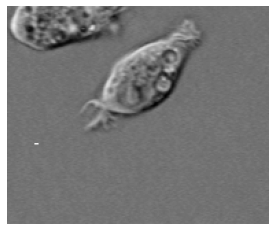

In [85]:
B = imread('cell.tif');
B[100,20] = -25
B[100,21] = -25
B[100,22] = -25
imshow(B, cmap='gray')
axis('off')
show()

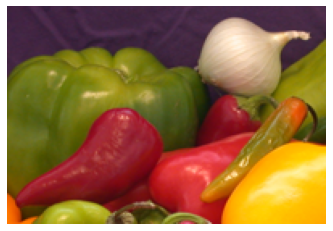

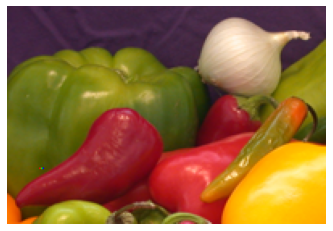

In [61]:
D = imread('onion.png');
imshow(D);
axis('off')
show()

D[100,20]=+np.array([255,0,0])
D[100,21]=+np.array([0,255,0])
D[100,22]=+np.array([0,0,255])

imshow(D);
axis('off')
show()

## Opgave 2 

Based on your answer to Exercise 1.1, use the for-loop construct in Python to loop over all the pixels in
the image and brighten or darken the image.

You will need to ensure that your program does not try to create a pixel value that is larger or smaller
than the pixel can hold. For instance, an 8-bit image can only hold the values 0–255 at each pixel
location and similarly for each colour channel for a 24-bit RGB colour image.

NOTE: Using a for-loop to access pixels in Python is not the most efficient approach, but sometimes it
is necessary and cannot be avoided.

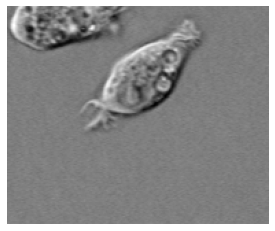

In [112]:
B = imread('cell.tif');

imshow(B, cmap='gray')
axis('off')
show()

In [106]:
print(B.shape)

(159, 191)


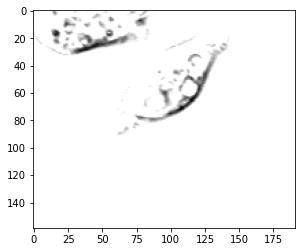

In [123]:
B = imread('cell.tif');

B = B.astype('int16')

for i in np.arange(0,159):
    for j in np.arange(0,191):
        B[i,j]+=150

B = np.clip(B,0,255).astype('uint8')
imshow(B,cmap='gray');


## Opgave 3

Using the grey-scale ‘cell.tif’ example image, investigate using different false colour maps to display the
image. The imshow function in Python can take a range of values to specify different false colour maps:
Read https://matplotlib.org/examples/color/colormaps_reference.html to get a full list of supported
color maps. 

What different aspects and details of the image can be seen using these false colourings in
place of the conventional grey-scale display?

## Opgave 4 

Load the cameraman.tif example image into Python and using the functions introduced in Example 1.1
save it once as a JPEG format file (e.g. sample.jpg) and once as a PNG format image (e.g. sample.png).

Next, reload the images from both of these saved files as new images in Python, ‘Ijpg’ and ‘Ipng’.
We may expect these two images to be exactly the same, as they started out as the same image and were
just saved in different image file formats. If we compare them by computing the absolute difference of
one image from the other at each pixel location we can check whether this assumption is correct.

Use the fact that images are represented as numpy arrays and that + and - operators are implemented to
work as pixel-wise operations. You can compute the pixel-wise absolute value with ‘numpy.fabs(x)’ or
vectorize the computation by using ‘vectorabs = np.vectorize(lambda x: abs(x))’. Use this to create a
difference image between ‘Ijpg’ and ‘Ipng’.

The difference between these two images is not all zeros as one may expect, but a noise pattern related
to the difference in the images introduced by saving in a lossy compression format (i.e. JPEG) and a
lossless compression format (i.e. PNG). The difference we see is due to the image information removed
in the JPEG version of the file which is not apparent to us when we look at the image.